## Synthetic data: Binary variables

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from synthesize_data import synthesize_data
import expectation_reflection as ER

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
l = 10000 ; n = 100 ; g = 5.

In [4]:
X,y,w0 = synthesize_data(l,n,g,data_type='continuous')

In [5]:
np.unique(y,return_counts=True)

(array([-1.,  1.]), array([5056, 4944]))

In [6]:
def inference(X_train,y_train,X_test,y_test):
    h0,w = ER.fit(X_train,y_train,niter_max=50)
    mse = ((w-w0)**2).mean() 
    y_pred = ER.predict(X_test,h0,w)        
    accuracy = accuracy_score(y_test,y_pred)                
    return w,mse,accuracy

In [7]:
def repeat_inference(X,y,train_size):
    npred = 100    
    w = np.zeros((npred,X.shape[1]))
    mse = np.zeros(npred)
    accuracy = np.zeros(npred)
    
    for ipred in range(npred):
        X, y = shuffle(X, y)
        X_train0,X_test,y_train0,y_test = train_test_split(X,y,test_size=0.2,random_state = ipred)
        idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y)),replace=False)
        X_train,y_train = X_train0[idx_train],y_train0[idx_train]
        
        w[ipred,:],mse[ipred],accuracy[ipred] = inference(X_train,y_train,X_test,y_test)
            
    return w[0],mse.mean(),mse.std(),accuracy.mean(),accuracy.std()

In [8]:
list_train_size = [0.2,0.4,0.6,0.8]

nsize = len(list_train_size)
w = np.zeros((nsize,X.shape[1]))
mse = np.zeros(nsize)
mse_std = np.zeros(nsize)
acc = np.zeros(nsize)
acc_std = np.zeros(nsize)
for i,train_size in enumerate(list_train_size):
    w[i,:],mse[i],mse_std[i],acc[i],acc_std[i] = repeat_inference(X,y,train_size)

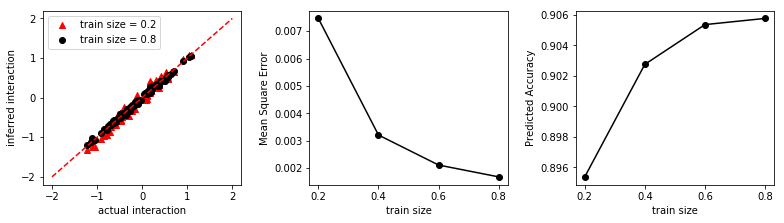

In [9]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.plot([-2,2],[-2,2],'r--')
plt.scatter(w0,w[0,:],marker='^',color='r',label='train size = 0.2')
plt.scatter(w0,w[-1,:],marker='o',color='k',label='train size = 0.8')
plt.xlabel('actual interaction')
plt.ylabel('inferred interaction')
plt.legend()

plt.subplot2grid((1,3),(0,1))
plt.plot(list_train_size,mse,'ko-')
#plt.fill_between(list_train_size,mse-mse_std,mse+mse_std)
plt.xlabel('train size')
plt.ylabel('Mean Square Error')

plt.subplot2grid((1,3),(0,2))
plt.plot(list_train_size,acc,'ko-')
#plt.fill_between(list_train_size,acc-acc_std,acc+acc_std)
plt.xlabel('train size')
plt.ylabel('Predicted Accuracy')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()